# PRJNA788395 - N'Guessan et al.

Article (preprint) link: https://www.medrxiv.org/content/10.1101/2022.02.01.22270170v1

In [1]:
suppressPackageStartupMessages({
    library(provoc)
    library(here)
    library(ggplot2)
    library(lubridate)
})


In [2]:
coco <- read.csv(
    here("data", "processed", 
        "PRJNA788395_processed.csv.gz")
)
# Matching time scale shown in paper
coco$date <- ymd(coco$date)
coco <- coco[coco$date >= ymd("2020-09-10") & 
    coco$date <= ymd("2021-06-17"), ]

coco <- coco[!is.na(coco$label), ]
coco$mutation <- parse_mutations(coco$label)
coco$zone <- coco$location
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population,zone
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<date>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>
1,10271,+10272.T,ins:10272:1,0,982,0,SRR17213487,2021-04-17,MTL_05_cpTP24h_Raw_17-04-2021_2-1350723_S301_L002,302,316300606,PRJNA788395,Montreal,28310,Montreal
2,11074,+11075.T,ins:11075:1,0,0,0,SRR17213487,2021-04-17,MTL_05_cpTP24h_Raw_17-04-2021_2-1350723_S301_L002,302,316300606,PRJNA788395,Montreal,28310,Montreal
3,11616,+11617.T,ins:11617:1,0,0,0,SRR17213487,2021-04-17,MTL_05_cpTP24h_Raw_17-04-2021_2-1350723_S301_L002,302,316300606,PRJNA788395,Montreal,28310,Montreal
4,12196,+12197.A,ins:12197:1,0,1468,0,SRR17213487,2021-04-17,MTL_05_cpTP24h_Raw_17-04-2021_2-1350723_S301_L002,302,316300606,PRJNA788395,Montreal,28310,Montreal
5,13077,+13078.T,ins:13078:1,0,1563,0,SRR17213487,2021-04-17,MTL_05_cpTP24h_Raw_17-04-2021_2-1350723_S301_L002,302,316300606,PRJNA788395,Montreal,28310,Montreal
6,13956,+13957.CG,ins:13957:2,0,2785,0,SRR17213487,2021-04-17,MTL_05_cpTP24h_Raw_17-04-2021_2-1350723_S301_L002,302,316300606,PRJNA788395,Montreal,28310,Montreal


In [3]:
head(coco)


,position,label,mutation,frequency,coverage,count,sra,date,sample_name,avg_spot_len,bases,bioproject,location,ww_population,zone
,<int>,<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<date>,<chr>,<int>,<int>,<chr>,<chr>,<int>,<chr>
1,10271,+10272.T,ins:10272:1,0,982,0,SRR17213487,2021-04-17,MTL_05_cpTP24h_Raw_17-04-2021_2-1350723_S301_L002,302,316300606,PRJNA788395,Montreal,28310,Montreal
2,11074,+11075.T,ins:11075:1,0,0,0,SRR17213487,2021-04-17,MTL_05_cpTP24h_Raw_17-04-2021_2-1350723_S301_L002,302,316300606,PRJNA788395,Montreal,28310,Montreal
3,11616,+11617.T,ins:11617:1,0,0,0,SRR17213487,2021-04-17,MTL_05_cpTP24h_Raw_17-04-2021_2-1350723_S301_L002,302,316300606,PRJNA788395,Montreal,28310,Montreal
4,12196,+12197.A,ins:12197:1,0,1468,0,SRR17213487,2021-04-17,MTL_05_cpTP24h_Raw_17-04-2021_2-1350723_S301_L002,302,316300606,PRJNA788395,Montreal,28310,Montreal
5,13077,+13078.T,ins:13078:1,0,1563,0,SRR17213487,2021-04-17,MTL_05_cpTP24h_Raw_17-04-2021_2-1350723_S301_L002,302,316300606,PRJNA788395,Montreal,28310,Montreal
6,13956,+13957.CG,ins:13957:2,0,2785,0,SRR17213487,2021-04-17,MTL_05_cpTP24h_Raw_17-04-2021_2-1350723_S301_L002,302,316300606,PRJNA788395,Montreal,28310,Montreal


In [4]:
sort(unique(substr(coco$sample_name, 1, 30)))


[1] "LVL_01_cpTP24h_rawWW_06-02-202" "LVL_01_cpTP24h_rawWW_06-03-202"
  [3] "LVL_01_cpTP24h_rawWW_06-06-202" "LVL_01_cpTP24h_rawWW_06-10-202"
  [5] "LVL_01_cpTP24h_rawWW_06-13-202" "LVL_01_cpTP24h_rawWW_2021-04-1"
  [7] "LVL_01_cpTP24h_rawWW_2021-04-2" "LVL_01_cpTP24h_rawWW_2021-05-0"
  [9] "LVL_01_cpTP24h_rawWW_2021-05-1" "LVL_01_cpTP24h_rawWW_2021-05-2"
 [11] "LVL_01_cpTP24h_rawWW_2021-05-3" "LVL_01_cpTP24h_rawWW_2021-06-0"
 [13] "LVL_02_cpTP24h_rawWW_06-02-202" "LVL_02_cpTP24h_rawWW_06-03-202"
 [15] "LVL_02_cpTP24h_rawWW_06-08-202" "LVL_02_cpTP24h_rawWW_06-09-202"
 [17] "LVL_02_cpTP24h_rawWW_06-10-202" "LVL_02_cpTP24h_rawWW_06-11-202"
 [19] "LVL_02_cpTP24h_rawWW_06-16-202" "LVL_02_cpTP24h_rawWW_2021-04-1"
 [21] "LVL_02_cpTP24h_rawWW_2021-04-2" "LVL_02_cpTP24h_rawWW_2021-04-3"
 [23] "LVL_02_cpTP24h_rawWW_2021-05-0" "LVL_02_cpTP24h_rawWW_2021-05-1"
 [25] "LVL_02_cpTP24h_rawWW_2021-05-2" "LVL_02_cpTP24h_rawWW_2021-05-3"
 [27] "LVL_02_cpTP24h_rawWW_2021-06-0" "LVL_03_cpTP24h_rawWW_06-17-202"
 [29] "LVL_03_cpTP24h_rawWW_2021-04-1" "LVL_03_cpTP24h_rawWW_2021-04-2"
 [31] "LVL_03_cpTP24h_rawWW_2021-04-3" "LVL_03_cpTP24h_rawWW_2021-05-0"
 [33] "LVL_03_cpTP24h_rawWW_2021-05-1" "LVL_03_cpTP24h_rawWW_2021-05-2"
 [35] "LVL_03_cpTP24h_rawWW_2021-06-0" "LVL_04_cpTP24h_rawWW_06-02-202"
 [37] "LVL_04_cpTP24h_rawWW_06-03-202" "LVL_04_cpTP24h_rawWW_2021-04-1"
 [39] "LVL_04_cpTP24h_rawWW_2021-04-2" "LVL_04_cpTP24h_rawWW_2021-04-3"
 [41] "LVL_04_cpTP24h_rawWW_2021-05-0" "LVL_04_cpTP24h_rawWW_2021-05-1"
 [43] "LVL_04_cpTP24h_rawWW_2021-05-2" "LVL_04_cpTP24h_rawWW_2021-06-0"
 [45] "LVL_05_cpTP24h_rawWW_06-02-202" "LVL_05_cpTP24h_rawWW_06-04-202"
 [47] "LVL_05_cpTP24h_rawWW_06-06-202" "LVL_05_cpTP24h_rawWW_06-07-202"
 [49] "LVL_05_cpTP24h_rawWW_06-08-202" "LVL_05_cpTP24h_rawWW_06-09-202"
 [51] "LVL_05_cpTP24h_rawWW_06-14-202" "LVL_05_cpTP24h_rawWW_06-15-202"
 [53] "LVL_05_cpTP24h_rawWW_06-16-202" "LVL_05_cpTP24h_rawWW_06-17-202"
 [55] "LVL_05_cpTP24h_rawWW_2021-04-2" "LVL_05_cpTP24h_rawWW_2021-05-0"
 [57] "LVL_05_cpTP24h_rawWW_2021-05-1" "LVL_05_cpTP24h_rawWW_2021-05-2"
 [59] "LVL_05_cpTP24h_rawWW_2021-06-0" "LV_A_2021-03-23_2-1392760_S357"
 [61] "LV_A_2021-03-24_2-1392773_S370" "LV_A_2021-03-31_2-1392699_S346"
 [63] "LV_A_2021-04-05_2-1392681_S328" "LV_A_2021-04-07_2-1392685_S332"
 [65] "LV_A_2021-04-08_2-1392693_S340" "LV_A_2021-04-14_2-1392696_S343"
 [67] "LV_A_2021_03-21_2-1392772_S369" "LV_A_2021_03-22_2-1392758_S355"
 [69] "LV_B_2021-03-21_2-1392757_S354" "LV_B_2021-03-22_2-1392784_S381"
 [71] "LV_B_2021-03-23_2-1392761_S358" "LV_B_2021-03-31_2-1392752_S349"
 [73] "LV_B_2021-04-04_2-1392751_S348" "LV_B_2021-04-05_2-1392682_S329"
 [75] "LV_B_2021-04-08_2-1392688_S335" "LV_B_2021-04-09_2-1392687_S334"
 [77] "LV_B_2021-04-13_2-1392698_S345" "LV_B_2021-04-14_2-1392697_S344"
 [79] "LV_C-2021-03-26_2-1392781_S378" "LV_C_2021-03-23_2-1392763_S360"
 [81] "LV_C_2021-03-24_2-1392762_S359" "LV_C_2021-03-25_2-1392780_S377"
 [83] "LV_C_2021-03-30_2-1392785_S382" "LV_C_2021-04-01_2-1392755_S352"
 [85] "LV_C_2021-04-06_2-1392686_S333" "LV_C_2021-04-09_2-1392680_S327"
 [87] "LV_C_2021-04-14_2-1392694_S341" "LV_C_2021-04-15_2-1392695_S342"
 [89] "LV_D_2021-03-23_2-1392778_S375" "LV_D_2021-03-24_2-1392779_S376"
 [91] "LV_D_2021-03-25_2-1392782_S379" "LV_D_2021-03-28_2-1392786_S383"
 [93] "LV_D_2021-03-30_2-1392783_S380" "LV_D_2021-03-31_2-1392753_S350"
 [95] "LV_D_2021-03-31_2-1392754_S351" "LV_D_2021-04-01_2-1392756_S353"
 [97] "LV_D_2021-04-02_2-1392691_S338" "LV_D_2021-04-02_2-1392692_S339"
 [99] "LV_D_2021-04-05_2-1392683_S330" "LV_D_2021-04-09_2-1392684_S331"
[101] "LV_D_2021-04-14_2-1392690_S337" "LV_D_2021-04-14_2-1392700_S347"
[103] "LV_D_2021-04-15_2-1392689_S336" "LV_E_2021-03-21_2-1392776_S373"
[105] "LV_E_2021-03-22_2-1392759_S356" "LV_E_2021-03-23_2-1392774_S371"
[107] "LV_E_2021-03-24_2-1392777_S374" "LV_E_2021-03-25_2-1392775_S372"
[109] "MTL-North_2-1339104_S110_L002"  "MTL-North_2-1339106_S112_L002" 
[111] "MTL-North_2-1339108_S114_L002"  "MT

In [5]:
pasteit <- function(...) toupper(paste0(..., collapse = "_"))
coco$location <- sapply(coco$sample_name,
    function(x) {
        splt <- strsplit(x, split = "(-|_)")[[1]]
        if (splt[2] == "WW") { # MTL-WW-N = MTL_NORTH
            return(pasteit(c(splt[1], "North")))
        } else if(splt[1] == "Qc") { # Qc_XX_DATE_(EAST|WEST)
            loc <- ifelse(any(grepl("West", splt)), "WEST", "EAST")
            return(pasteit(c("QC", loc)))
        } else if(splt[2] == "Site") { # MTL_SITE_16
            return(pasteit(splt[1:3]))
        } else {
            return(pasteit(splt[1:2]))
        }
    }
)


In [6]:
lineages_in_paper <- c("A.2.5", "B.1.1.7", "B.1.160")
barcodes <- provoc::usher_barcodes()
available_lineages <- intersect(lineages_in_paper, rownames(barcodes))
barcodes <- filter_lineages(barcodes, available_lineages)
rownames(barcodes)


[1] "B.1.1.7" "A.2.5"   "B.1.160"

In [ ]:
system.time(
    res <- provoc(count / coverage ~ .,
        data = coco,
        lineage_defs = barcodes,
        by = "sra")
)
head(res)


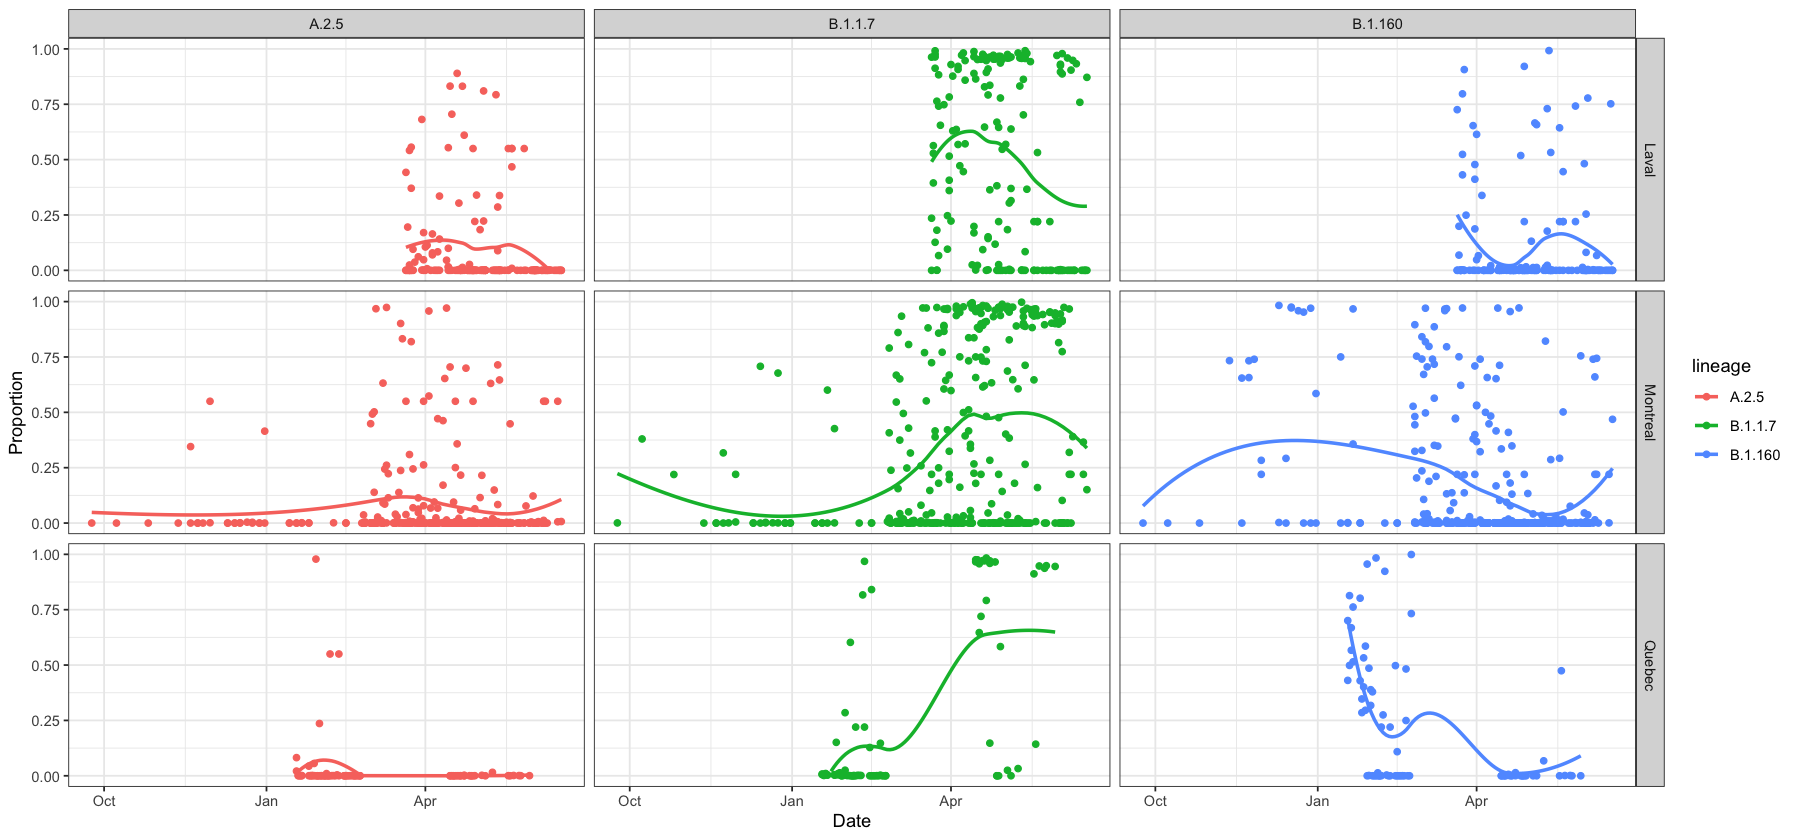

In [8]:
options(repr.plot.width = 15, repr.plot.height = 7)

res$date <- lubridate::ymd(res$date)

gg <- autoplot(res, date_col = "date") +
    facet_grid(zone ~ lineage) + # Match figure in paper
    geom_smooth(formula = y ~ x, se = FALSE, method = "loess") +
    theme_bw()
suppressWarnings(print(gg))
